# Exploring the history of Linux commits over the year.

Version control repositories like CVS, Subversion or Git can be a real gold mine for software developers. They contain every change to the source code including the date (the "when"), the responsible developer (the "who"), as well as little message that describes the intention (the "what") of a change.

<img src="tux.jpeg" alt="Drawing" style="width: 200px;"/>

In this notebook, we will analyze the evolution of a very famous open-source project – the Linux kernel. The Linux kernel is the heart of some Linux distributions like Debian, Ubuntu or CentOS.

We get some first insights into the work of the development efforts by

##### identifying the TOP 10 contributors and
##### visualizing the commits over the years.


Linus Torvalds, the (spoiler alert!) main contributor to the Linux kernel (and also the creator of Git), created a mirror of the Linux repository on GitHub. It contains the complete history of kernel development for the last 13 years.



## Importing dependencies and Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
git_log = pd.read_csv("datasets/git_log.gz", sep = "#", encoding = 'latin-1', 
                      header=None, names=["timestamp", "author"])

git_log.head()

,timestamp,author
0,1502826583,Linus Torvalds
1,1501749089,Adrian Hunter
2,1501749088,Adrian Hunter
3,1501882480,Kees Cook
4,1497271395,Rob Clark


## Wrangling and exploring

In [3]:
# Shape of the dataset 
# The number of rows tells us the amount of commits people have done to the Original linux repository.
# upto 700,000

git_log.shape

(699071, 2)

In [4]:
# How many unique authors for these commits?
# Over 17,000 people have commited to the Linux repo.

git_log['author'].nunique()

17385

In [5]:
# Top 10 contributors: 
# Linus leads the way with over 20k commits. Insane. 

git_log['author'].value_counts().head(10)

Linus Torvalds           23361
David S. Miller           9106
Mark Brown                6802
Takashi Iwai              6209
Al Viro                   6006
H Hartley Sweeten         5938
Ingo Molnar               5344
Mauro Carvalho Chehab     5204
Arnd Bergmann             4890
Greg Kroah-Hartman        4580
Name: author, dtype: int64

In [6]:
# Convert the timestamp column to datetime. Which gives us an option to create new date features to analyze

git_log['timestamp'] = pd.to_datetime(git_log['timestamp'], unit = 's')
git_log['timestamp'].head()

0   2017-08-15 19:49:43
1   2017-08-03 08:31:29
2   2017-08-03 08:31:28
3   2017-08-04 21:34:40
4   2017-06-12 12:43:15
Name: timestamp, dtype: datetime64[ns]

In [7]:
# Extracting Year 

git_log['year'] = list(map(lambda x: x.year, git_log['timestamp']))
git_log.head()

,timestamp,author,year
0,2017-08-15 19:49:43,Linus Torvalds,2017
1,2017-08-03 08:31:29,Adrian Hunter,2017
2,2017-08-03 08:31:28,Adrian Hunter,2017
3,2017-08-04 21:34:40,Kees Cook,2017
4,2017-06-12 12:43:15,Rob Clark,2017


In [8]:
# Lets check the year feature.
# Looks like 2037 is an erroneous value.

git_log['year'].describe()

count    699071.000000
mean       2012.031101
std           3.317334
min        1970.000000
25%        2009.000000
50%        2012.000000
75%        2015.000000
max        2037.000000
Name: year, dtype: float64

In [9]:
# Are there any more erroneous values in year?
# Yep. 2030 is one. And so is 2019 in this matter.
# Lets drop em.

git_log['year'].unique()


array([2017, 2015, 2016, 2014, 2013, 2012, 2011, 2010, 2001, 2009, 2008,
       2007, 2037, 2006, 2002, 2030, 1970, 2005, 2003, 2004, 2019])

In [10]:
# Dropped 3 erroneous rows.

git_log.drop(git_log[git_log['year'] > 2018].index, inplace= True)

In [11]:
# Do we have any more erroneous data?
# Nop.

git_log.query('timestamp < 1970 & timestamp > 2018')

,timestamp,author,year


In [24]:
# Lets further explore time stamps. 
# The first commit ever made?
# Way back in jan of 1970.
# The last was not too long ago.

print("The first commit: ", git_log['timestamp'].min())
print("The last or most recent commit: ", git_log['timestamp'].max())

The first commit:  1970-01-01 00:00:01
The last or most recent commit:  2017-10-03 12:57:00


In [13]:
# Lets group commits by year

commits_per_year = git_log.groupby(pd.Grouper(key='timestamp', freq='AS')).count()
commits_per_year.rename(columns={'author': 'num_commits'}, inplace=True)
commits_per_year.drop('year', axis=1,inplace=True)

In [14]:
commits_per_year.tail()

,num_commits
timestamp,
2013-01-01,71001
2014-01-01,75642
2015-01-01,75747
2016-01-01,76688
2017-01-01,47217


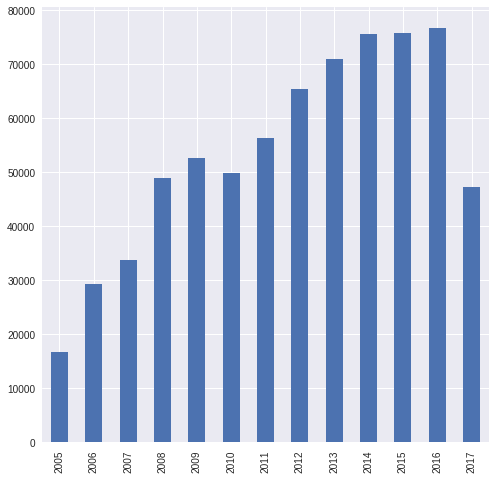

In [21]:
# The plot indicates the year 2016 to have the most commits.

plt.figure(figsize=(8,8))
git_log[git_log['year'] >= 2005]['year'].value_counts().sort_index().plot(kind='bar')

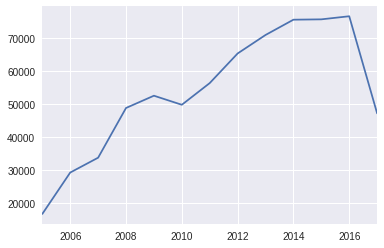

In [23]:
# Yep. 2016 it is.
git_log[git_log['year'] >= 2005]['year'].value_counts().sort_index().plot()